<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [5]:
def f(x, w, b):
    suma = w.dot(x) + b
    return 1*(suma > 0)

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

In [6]:

class Perceptron(object):

    def __init__(self, N_inputs, N=1, eta=0.01):
        self.N = N
        self.eta = eta
        self.accuracy = []
        self.effective_array = []
        self.tiempo_entrenamiento = 0
        self.pesos = np.zeros(N_inputs + 1)
           
    def predict(self, inputs):
        condicion = f(inputs, self.pesos[1:], self.pesos[0])      
        return condicion

    def train(self, training_inputs, outputs):
        tiempo_inicial = time() 
        for _ in range(self.N):
            accuracy = [0]
            effective_array = [0]
            for entrada, output in zip(training_inputs, outputs):
                prediction = self.predict(entrada)
                accuracy.append(1*(prediction == output) + accuracy[len(accuracy)-1])
                effective_array.append(1+effective_array[len(effective_array)-1])
                self.pesos[1:] += self.eta * (output - prediction) * entrada # too w<-w-u*y1*x1
                self.pesos[0] += self.eta * (output - prediction)
            self.accuracy = accuracy
            self.effective_array = effective_array
        tiempo_final = time() 
        self.tiempo_entrenamiento = tiempo_final - tiempo_inicial

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data = load_breast_cancer()

In [8]:
x = data.data
y = data.target

test_size = 0.2
random_state = 0

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state = random_state)

# Standarización:
sc = StandardScaler()
# Ajustar con los datos de entrenamiento
sc.fit(X_train)
sc.fit(X_test)
#Escalar datos de entrenamiento y test
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
eta = 0.1
P = Perceptron(X_train_std.shape[1], 1, eta)
P.train(X_train_std, y_train)
print("entrenado en {} seg".format(P.tiempo_entrenamiento))

entrenado en 0.009972095489501953 seg


In [21]:
acc = 0
predict_array = [0]
for i in range(len(X_test_std)):
    predict = P.predict(X_test_std[i])
    if(predict == y_test[i]):
        predict_array.append(acc)
        acc+=1

accuracy test (red): '97'%
accuracy training(blue): 95.0%
accuracy ideal (green)


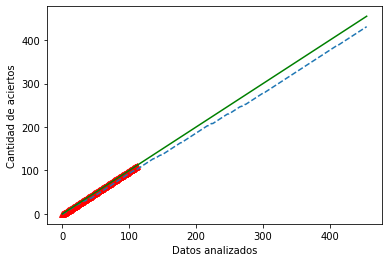

In [22]:
print("accuracy test (red): '{}'%".format(round(acc/len(y_test)*100)))
print("accuracy training(blue): {}%".format(round(P.accuracy[len(P.accuracy)-1]/len(y_train)*100)))
print("accuracy ideal (green)")
plt.plot(predict_array, 'r^')
plt.plot(P.accuracy, '--')
plt.plot(P.effective_array, 'g')
plt.xlabel('Datos analizados')
plt.ylabel('Cantidad de aciertos')
plt.show()

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

##### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

In [23]:
def sigmoidal(𝜉):
    exponencial = np.exp(-𝜉) # con numpy no hay problemas de límites, la operación se realiza con éxito
    return 1/(1+ exponencial)

def G(x,w,b):
    return sigmoidal(w.dot(x) + b) # .dot = sum(wj * xj)

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

In [25]:
def Loss_function(y, x,w,b):
    g = G(x, w, b)
    fun_g = g if(g > 0.1e-322) else 0.1e-322
    return -y*np.log(fun_g)-(1-y)*np.log(1-fun_g)


> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

In [26]:
def gradiente(y, x,w,b):
    return (G(x,w,b)-y)*x

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

In [34]:

class Perceptron_gradiente(object):

    def __init__(self, N_inputs, N=1, eta=0.01):
        self.N = N
        self.eta = eta
        self.accuracy = []
        self.pesos = np.zeros(N_inputs + 1)
        self.Loss = []
        self.tiempo_entrenamiento = 0
           
    def predict(self, inputs):
        condicion = G(inputs, self.pesos[1:], self.pesos[0])      
        return condicion

    def train(self, training_inputs, outputs):
        tiempo_inicial = time() 
        for _ in range(self.N):
            accuracy = [0]
            effective_array = [0]
            fail_array = [0]
            for entrada, output in zip(training_inputs, outputs):
                prediction = self.predict(entrada)
                effective_array.append(1+effective_array[len(effective_array)-1])
                
                self.pesos[1:] -= self.eta * gradiente(output, entrada, self.pesos[1:],self.pesos[0])
                self.pesos[0] -= self.eta * (output - prediction)                
                
                fail_array.append(1*(prediction>0.5) == output)
                accuracy.append(sum(fail_array)/(len(accuracy)))
                self.Loss.append(Loss_function(output, entrada,self.pesos[1:],self.pesos[0]))
            self.accuracy = accuracy
            self.effective_array = effective_array
        tiempo_final = time() 
        self.tiempo_entrenamiento = tiempo_final - tiempo_inicial

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

In [35]:
N = 1
P = Perceptron_gradiente(X_train_std.shape[1], N, 0.001)
P.train(X_train_std, y_train)
print("entrenado en {} seg.".format(P.tiempo_entrenamiento))

entrenado en 0.22342658042907715 seg.


In [36]:
acc = 0
predict_array = [0]
for i in range(len(X_test_std)):
    predict = P.predict(X_test_std[i])
    if(1*(predict>=0.5) == y_test[i]):
        predict_array.append(acc)
        acc+=1

accuracy training(blue): 94.72527472527472%


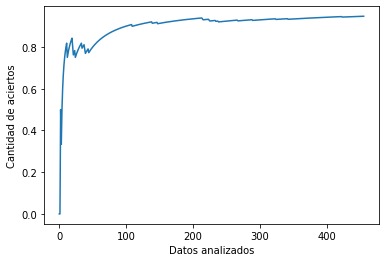

In [46]:
# print(P.accuracy)
print("accuracy training(blue): {}%".format(100*P.accuracy[len(P.accuracy)-1]))
plt.plot(P.accuracy)
plt.xlabel('Datos analizados')
plt.ylabel('Cantidad de aciertos')
plt.show()

accuracy test (red): '93'%
accuracy ideal (green)


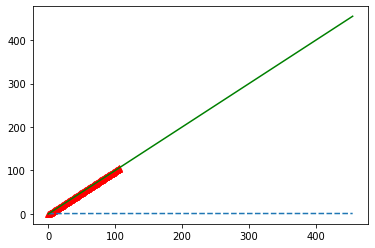

In [48]:
print("accuracy test (red): '{}'%".format(round(acc/len(y_test)*100)))
print("accuracy ideal (green)")
plt.plot(predict_array, 'r^')
plt.plot(P.accuracy, '--')
plt.plot(P.effective_array, 'g')

Text(0, 0.5, 'Loss function(W)')

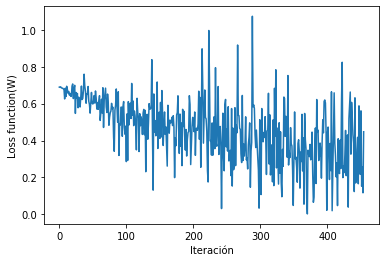

In [19]:
plt.plot(P.Loss)
plt.xlabel('Iteración')
plt.ylabel('Loss function(W)')

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  